# **AGN Spectral Decomposition and Black‐Hole Mass Estimation**

This notebook demonstrates how to download a Sloan Digital Sky Survey (SDSS) spectrum for a selected active galactic nucleus (AGN), decompose the spectrum into host galaxy and AGN components using principal component analysis (PCA) with galaxy and quasar eigen‐spectra, fit the Hβ emission line, and compute physical quantities such as the black‑hole mass, bolometric luminosity, accretion rate and e‑folding growth time.

**Note:** This notebook is designed for execution in a cloud notebook environment such as Google Colab with internet access and requires the `astroquery`, and `matplotlib` packages. The eigen‐spectra files must be provided separately (using Google Drive).

**Task** Where you see
  ### **...**  
You will need to add your answer, debug, or write part of the code

So, good luck!

In [1]:
#install astroquery
!pip install ...

ERROR: Invalid requirement: '...': Expected package name at the start of dependency specifier
    ...
    ^


In [ ]:
#Mounting Google Drive Here:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# List files in your MyDrive
#!ls /content/drive/MyDrive

# Download data files and put them into your Google Drive
# Call the folder, "ThaiPASS2025"
# Change to a project folder
import os
os.chdir('/content/drive/MyDrive/...')


In [ ]:
#Double check where we are...
!pwd

/content/drive/MyDrive/ThaiPASS2025


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.table import Table

from scipy.optimize import curve_fit
from scipy import signal


# File path to the DR16 quasar table ('table_dr16_qso_krc213.csv') provided in this repository
csv_path = ...  # adjust path
df = pd.read_csv(csv_path)
print(f'The table contains {len(df)} AGN entries.')
df.head()


The table contains 40878 AGN entries.


,specObjID,ra,dec,u,err_u,g,err_g,r,err_r,i,...,spectroFlux_u,spectroFluxIvar_u,spectroFlux_g,spectroFluxIvar_g,spectroFlux_r,spectroFluxIvar_r,spectroFlux_i,spectroFluxIvar_i,spectroFlux_z,spectroFluxIvar_z
0,961627961662924800,205.527367,5.089971,17.24312,0.008712,17.12692,0.004209,16.88774,0.004199,16.84807,...,94.272620,1.329245,104.260100,3.374295,134.029700,2.201848,136.15840,1.679969,202.49170,0.790631
1,7201334800795586560,130.273531,44.108804,20.73387,0.072431,20.28794,0.025602,20.09188,0.030066,19.69925,...,6.429861,1.903253,7.129987,14.501150,7.657137,10.219570,10.06271,7.592605,11.33003,2.839128
2,532639748741687296,138.748222,2.586392,17.89646,0.014938,17.56299,0.006085,17.05423,0.005189,16.70033,...,36.364980,0.987725,44.658330,1.766435,69.617350,1.666925,96.60953,1.402571,106.13530,0.639603
3,529214770021165056,136.521454,0.047926,19.84063,0.053406,19.22997,0.015623,18.51402,0.012645,18.10305,...,5.160207,1.222138,9.456963,3.278702,17.468800,3.063213,23.28798,2.430623,25.31125,1.266187
4,8262077660471250944,214.371964,53.307371,19.76099,0.040386,19.32400,0.013422,18.56183,0.010332,18.08352,...,12.298420,1.518151,13.832560,6.713978,23.723320,5.452270,35.26195,4.171300,45.02294,1.771778


### **Select a target AGN**

Choose an AGN from the catalog by index, `specObjID`, or coordinates.  The SDSS spectral identification is given by `plate`, `mjd` and `fiberID`, which uniquely identify a spectrum in SDSS.  You can also use the right ascension and declination to query the nearest spectrum.  In this example we select the first row of the catalog:

In [ ]:
# Select the first AGN in the list
idx = ...  # change this index to analyze a different object
row = df.iloc[idx] # iloc is used for integer-location. This will request the row that corresponds to that idx.

plate = int(row['plate'])
mjd = ...
fiber = ...
ra = ...
dec = ...
redshift = ...

print(f'Selected AGN index {idx}: plate={plate}, mjd={mjd}, fiberID={fiber}, ra={ra:.5f}, dec={dec:.5f}, redshift={redshift:.5f}')


Selected AGN index 0: plate=854, mjd=52373, fiberID=398, ra=205.52737, dec=5.08997, redshift=0.26571


**List the wavelengths** at the rest-frame and the observed frame of the following key emission lines:

 Hβ, Hα, [OIII] doublets, and [NII] doublets

In [ ]:
wvl_Hb = ...  # [Å]
wvl_Ha = 6562.81  # [Å]
...
...
...

...





...

### **Download the SDSS spectrum**

Use `astroquery.sdss.SDSS` to retrieve the calibrated spectrum.  You can query by `plate`, `mjd` and `fiberID` or by sky coordinates within a search radius.

Then plot the 1D spectrum with the indications of the "redshifted" key emission lines.

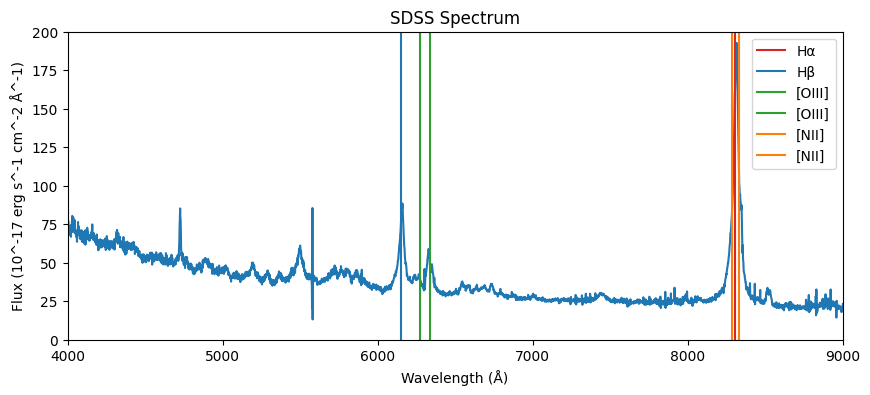

In [ ]:
# Query the SDSS archive for the spectrum
# Using plate, mjd, fiberID:
spec_list = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)

# Alternatively: use sky coordinates if plate/mjd/fiber are not known
# coords = SkyCoord(ra* u.deg, dec* u.deg, frame='icrs')
# spec_list = SDSS.get_spectra(matches=coords, radius=2*u.arcsec)

# Retrieve the first spectrum and convert to a Pandas DataFrame
spec = spec_list[0]
data = spec[1].data  # table with wavelength and flux
wave = data['loglam']  # log10 of wavelength in angstroms
wavelength = ...
flux = data['flux']

# Plot the full spectrum
plt.figure(figsize=(10,4))
plt.plot(wavelength, flux)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (10^-17 erg s^-1 cm^-2 Å^-1)')
plt.title('SDSS Spectrum')
plt.xlim([4000.0,9000.0])
plt.ylim([0.0,200.0])

plt.plot([wvl_Ha_obs,wvl_Ha_obs],[0.0,200.0], label='Hα', color='tab:red')
...
...
...

...
...
plt.legend()
plt.show()


### **Perform PCA decomposition**

Load precomputed galaxy and quasar eigen‐spectra (principal components) and perform a least‐squares fit to reconstruct the host galaxy and AGN components.  The eigenspectra must be aligned to the same wavelength grid as the observed spectrum (e.g., via interpolation).  The decomposition uses separate sets of galaxy and quasar eigenspectra to efficiently and reliably separate the AGN and host components.  For demonstration we assume the eigenspectra are stored as NumPy arrays with shape `(n_components, n_pixels)`.


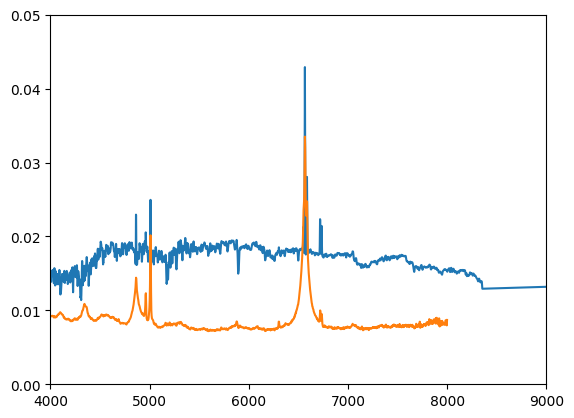

In [ ]:
# Load the eigen‐spectra arrays
# Reading in Templates

template_agn_path = 'data/eigSpec_qso_'
template_gal_path = 'data/galaxyKL_eigSpec_'


gal_ord = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
agn_ord = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Try the first order eigenspectrum of each catagory first
# Plot them to see what they look like
lambda_gal, f_gal0 = np.loadtxt(template_gal_path + gal_ord[0] + '.dat', unpack=True, usecols = (0,1))
lambda_agn, f_agn0 = ...

plt.plot(lambda_gal,f_gal0)
plt.plot(lambda_agn,f_agn0)
plt.xlim([4000,9000])
plt.ylim([0.0,0.05])
plt.show()

In [ ]:
#Read in all necessary eigen spectra. No worries. For each type, they "might not" have the same wavelength array.
lambda_gal0, f_gal0 = np.loadtxt(template_gal_path + gal_ord[0] + '.dat', unpack=True, usecols = (0,1))
...
...
...
...

lambda_agn0, f_agn0 = np.loadtxt(template_agn_path + agn_ord[0] + '.dat', unpack=True, usecols = (0,1))
...
...
...
...

#Create a function called eigen_model with 10 coefficients (5 for AGN eigen values + 5 for galaxy eigen values)
#The model spectrum is the linear sum of eigen-values*eigen_vector
#Hint: Use numpy.interp function to help with the data grid
def eigen_model(x,a0,a1,a2,a3,a4,g0,g1,g2,g3,g4):
  fg0 = np.interp(x,...,...)
  fg1 = ...
  ...
  ...
  ...

  fa0 = ...
  ...
  ...
  ...
  ...

  flux_dens_total = ...

  return flux_dens_total

#print(len(f_agn1),len(f_agn2),len(f_agn0), len(lambda_agn))

In [ ]:
#Calculate rest-frame wavelength and flux of the AGN
wavelength_rest = wavelength/...
flux_rest = ...

#Get the eigen values from the curve_fit between the rest-frame spectrum and the model
eigen_vals, eigen_covs = curve_fit(...)
print(eigen_vals)

#Define which set of coeeficients belongs to which component (i.e., AGN or galaxy)
agn_coeff = eigen_vals[...]
gal_coeff = eigen_vals[...]

[ 1254.1655501   4096.61767619 -1993.51232842  5936.66293489
   304.75759166  -759.88799996  -168.5657607    161.28847378
  -137.5589956     39.96153397]


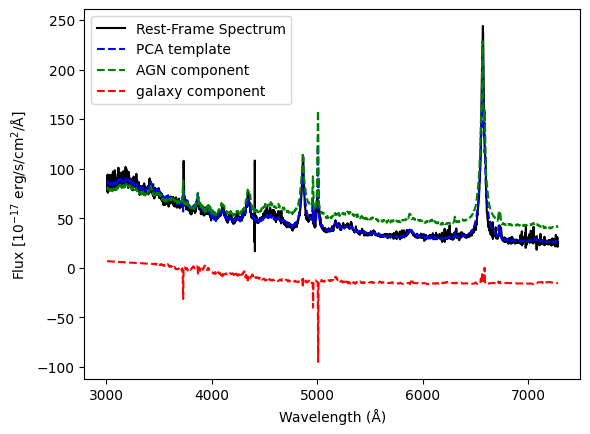

In [ ]:
# Make a comparison plot between (i) the rest-frame spectrum, (ii) the model, (iii) the AGN component, and (iv) the galaxy component
plt.plot(wavelength_rest, flux_rest, 'k-', label='Rest-Frame Spectrum')
plt.plot(wavelength_rest, eigen_model(wavelength_rest, *eigen_vals), 'b--', label='PCA template')
plt.plot(wavelength_rest, eigen_model(wavelength_rest, ...), 'g--', label='AGN component')
plt.plot(wavelength_rest, eigen_model(wavelength_rest, ...), 'r--', label='galaxy component')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/s/cm$^2$/Å]')
plt.legend()
plt.show()
plt.show()

### Subtract the galaxy component

Subtract the reconstructed host galaxy spectrum from the observed spectrum to produce a pure AGN spectrum.  This step removes starlight and other host contributions, isolating the broad emission lines.  In code:


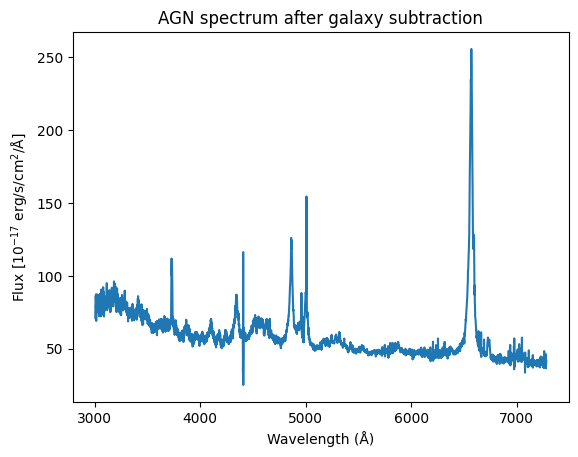

In [ ]:
 #Get the "pure_agn" spectrum and plot it to see what it looks like
 pure_agn = ...
 plt.plot(wavelength_rest, pure_agn)
 plt.xlabel('Wavelength (Å)')
 plt.ylabel('Flux [$10^{-17}$ erg/s/cm$^2$/Å]')
 plt.title('AGN spectrum after galaxy subtraction')
 plt.show()

### **Fit the Hβ emission line**

Estimate the continuum around the Hβ emission line and model the line profile as a sum of a narrow and a broad Gaussian component plus continuum.  We fit a linear continuum to wavelength windows free from strong emission (e.g., 4750–4830 and 4920–5000 Å in the rest frame) and subtract it.  Then we use `scipy.optimize.curve_fit` to fit Gaussian functions to the continuum‐subtracted line region.

The full width at half maximum (FWHM) of the broad Hβ component can be converted to velocity using the relation FWHM_velocity = ̧\(c ×	Δλ/λ_0), where (c) is the speed of light and \(Δλ) is the measured FWHM in angstroms.  The same relation can be used to convert line widths into km s⁻¹ when estimating black‐hole masses.


In [ ]:
# Define Gaussian model for broad and narrow components
def gaussian(x, amp, center, sigma):
    return amp * np.exp(-0.5 * ((x - center)/sigma)**2)

# Define a combined model: continuum + narrow + broad
def hb_model(x, cont_slope, cont_intercept, amp_n, cen_n, sigma_n, amp_b, cen_b, sigma_b):
    cont = cont_slope * x + cont_intercept
    narrow = ...
    broad = ...
    return cont + narrow + broad

# Rest wavelength of Hβ at 4861 Å
lambda_hb_rest = ...
lambda_rest = ...

# Select wavelength region around Hβ (±100 Å)
mask = (wavelength_rest > ...) & (wavelength_rest < ...)
x_data = wavelength_rest[...]
y_data = flux_rest[...]

# Initial guesses: slope ~0, intercept ~median flux, approximate amplitudes and sigmas
p0 = [0.0, np.median(y_data),
      np.max(y_data), lambda_hb_rest, 5.0,  # narrow component
      np.max(y_data)/2, lambda_hb_rest, 20.0]  # broad component


In [ ]:
#Take a quick peek at the initial guess
print(p0)

[0.0, np.float64(50.30853374991761), np.float64(244.0177866352051), 4861.33, 5.0, np.float64(122.00889331760256), 4861.33, 20.0]


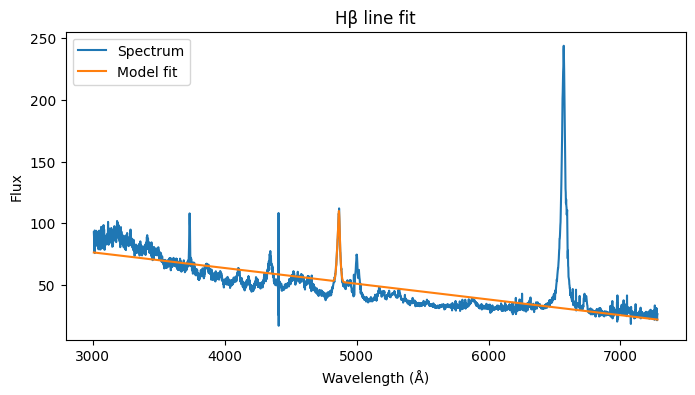

In [ ]:
# Fit the model to the data
popt, pcov = curve_fit(hb_model, ..., ..., p0=...)

# Extract fitted parameters
......................................... = popt

# Compute FWHM of broad component in angstroms and convert to km/s
fwhm_angstrom = 2 * np.sqrt(2*np.log(2)) * sigma_b
fwhm_kms = ...

# Plot the fitted result
model_fit = hb_model(x_data, *popt)
plt.figure(figsize=(8,4))
plt.plot(x_data, y_data, label='Spectrum')
plt.plot(x_data, model_fit, label='Model fit')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend()
plt.title('Hβ line fit')
plt.show()


### **Compute monochromatic luminosity and bolometric luminosity**

After subtracting the continuum and fitting the broad Hβ component, compute the monochromatic continuum luminosity at 5100 Å (rest frame) using the relation (L_λ = 4π(d_L^2) f_λ), where (d_L) is the luminosity distance and (f_λ) is the flux density at 5100 Å.  Astronomers often report (λL_λ(5100 Å)).  The bolometric luminosity can be estimated from the continuum luminosity with a bolometric correction factor (L_bol ≈ 9× λL_λ(5100 Å)).


In [ ]:
# Example calculation for monochromatic luminosity at 5100 Å
from astropy.cosmology import Planck18 as cosmo

# Suppose we measured flux density at observed 5100*(1+z) Å after continuum fit:
lambda_5100 = ...
f_lambda = (... + ...*lambda_5100)*...
d_L = cosmo.luminosity_distance(...).to(u.cm).value
lam_L_lam = lambda_5100 * ...  # erg/s
L_bol = 9 * lam_L_lam

print('lambda L_lambda (5100 Å) =', lam_L_lam, 'erg/s')
print('Bolometric luminosity =', L_bol, 'erg/s')


lambda L_lambda (5100 Å) = 5.8804636064631936e+44 erg/s
Bolometric luminosity = 5.292417245816874e+45 erg/s


### **Estimate black‐hole mass**

Use a single‐epoch virial estimator based on the broad Hβ line width and continuum luminosity.  Following Vestergaard & Peterson (2006), the black‐hole mass can be computed as

log M_BH/M_⊙ = 6.91 + 2log(FWHM_Hβ/1000 km/s) + 0.5log(λL_λ(5100 Å)/10^44 erg/s).

Compute the Eddington luminosity as [L_Edd = 1.26×10^38 (M_BH/M_⊙) erg/s] for ionized gas and obtain the Eddington ratio (L_bol/L_Edd).


In [ ]:
# M_sun = 1.989e33  # g
FWHM_kms = fwhm_kms
lam_L_lam_44 = lam_L_lam / 1e44
log_M_bh = ...  # log(solar masses)
M_bh = 10.0**log_M_bh

# Compute Eddington luminosity and Eddington ratio
L_edd = 1.26e38 * M_bh
edd_ratio = ...

print('Black hole mass =', log_M_bh, 'log[M_sun]')
print('Eddington ratio =', edd_ratio)


Black hole mass = 7.779624720224378 log[M_sun]
Eddington ratio = 0.6976840758326134


### **Accretion rate and exponential growth**

Assuming a radiative efficiency \(η ≈ 0.1\), the mass accretion rate is (Ṁ = L_bol/ (η c^2)).  The Salpeter (e‐folding) time for black hole growth is

t_S ≈ 4.5×10^7 (η/0.1) (L_Edd/L_bol) [year]

The time required for the black hole to grow from its current mass (M_BH) to a final mass (M_final) (e.g., 10^10 M_⊙) under continuous sub-Eddington accretion is

t = t_S ln(M_final/M_BH)

Compute the accretion rate, the Salpeter time, and the growth time for the AGN.


In [ ]:
eta = 0.1
c_cm_s = 2.99792458e10
M_sun  = 1.989e33 #grams

Mdot = .../ M_sun  # in M_sun/s
Mdot_per_year = ...

# Salpeter time in years
t_salpeter = ...

# # Target mass (e.g., 1e10 M_sun)
M_final = 1e10
t_growth = ...

print('Mass accretion rate =', Mdot_per_year, 'M_sun/yr')
print('Salpeter time =', t_salpeter/..., 'Myr')
print('Growth time to 1e10 M_sun =', t_growth/..., 'Gyr')



Mass accretion rate = 0.9336508435131833 M_sun/yr
Salpeter time = 64.49910720163304 Myr
Growth time to 1e10 M_sun = 0.3297583302704898 Gyr


## Summary

This notebook outlines a workflow for downloading SDSS spectra, isolating the AGN component via PCA, fitting the Hβ emission line, and deriving physical quantities such as black‐hole mass, bolometric luminosity, accretion rate and growth time.  The approach follows recent studies that use galaxy and AGN templates to isolate the AGN contribution in SDSS spectra and adopt virial black‐hole mass estimators from the literature.  The conversion from spectral line width to velocity uses the standard relation between FWHM and velocity.  Bolometric luminosities are estimated using a 5100 Å continuum bolometric correction, and Eddington luminosities follow the classical formula for hydrogen‐dominated gas.  Accretion rates and e‑folding times are computed following standard accretion physics.

Use this notebook as a template to explore a sample of AGN.  Replace placeholder values with measurements from your own spectra and adjust the fit regions and initial parameters as necessary.
